In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from utils import plot_cardio_distribution, plot_cholesterol_distribution

df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
df.info()
# Inga värden som saknas vilket är bra (inga null-värden)

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [3]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


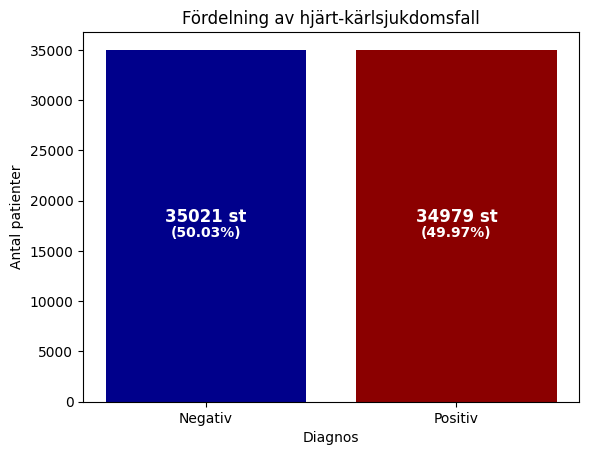

In [4]:
# Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?
plot_cardio_distribution(df)

<Axes: xlabel='cardio', ylabel='count'>

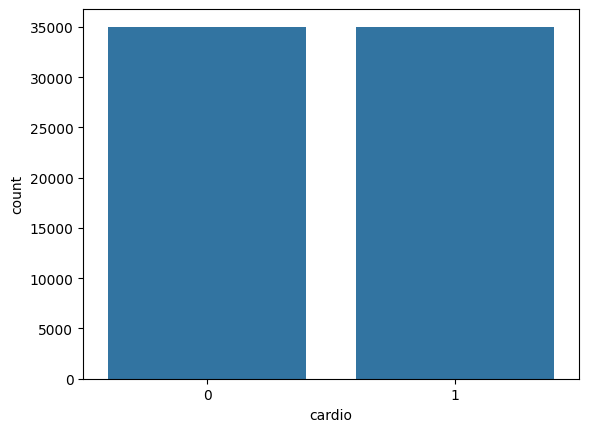

In [5]:
# TODO: Är denna bäst för att besvara "Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?" ?
sns.countplot(data=df, x='cardio')

Datasetet uppvisar en jämn fördelning mellan patienter med och utan diagnostiserad hjärt-kärlsjukdom, vilket säkerställer att maskininlärningsmodellen tränas på en rättvis representation av båda klasserna och inte favoriserar den vanligaste.

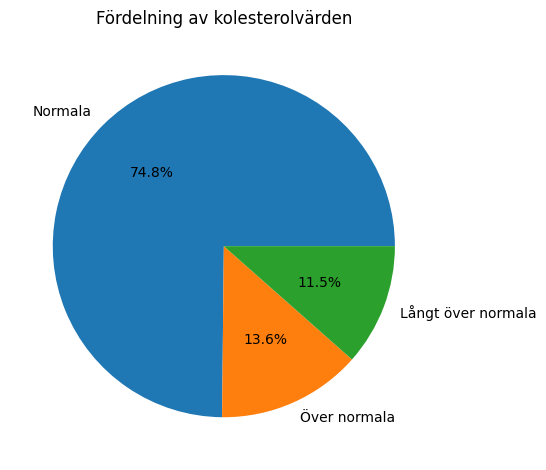

In [6]:
# Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.
plot_cholesterol_distribution(df)

<Axes: >

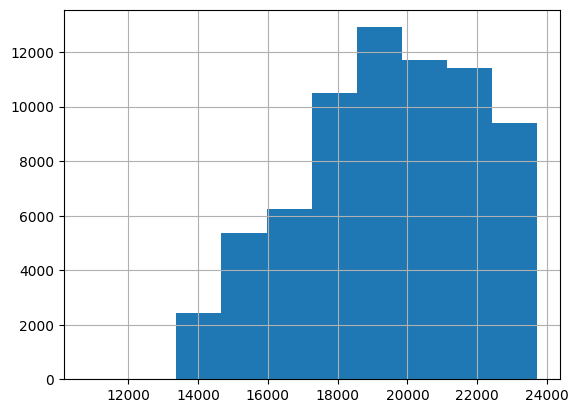

In [7]:
# Hur ser åldersfördelningen ut? Rita ett histogram.
# TODO: Labels and title
df["age"].hist()

In [8]:
# Hur stor andel röker?
smokers = df[df["smoke"] == 1]
print(f"{len(smokers)} av totalt {len(df)} röker")

6169 av totalt 70000 röker


<Axes: >

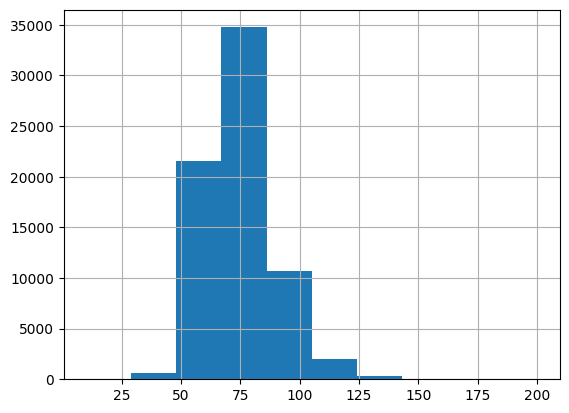

In [9]:
# Hur ser viktfördelningen ut? Rita lämpligt diagram.
# TODO: Labels and title
df["weight"].hist()

<Axes: >

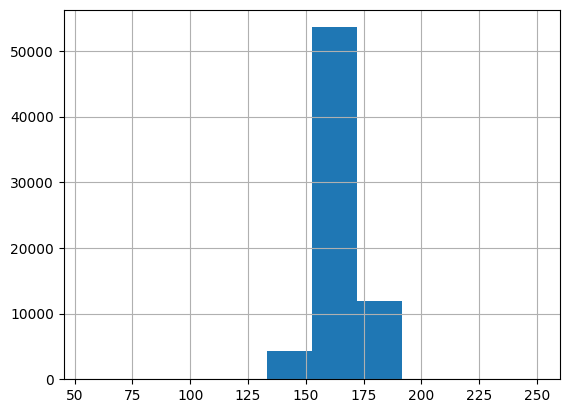

In [10]:
# Hur ser längdfördelningen ut? Rita lämpligt diagram.
# TODO: Labels and title
df["height"].hist()

heart_disease_by_gender gender
1    64.655936
2    35.344064
Name: proportion, dtype: float64


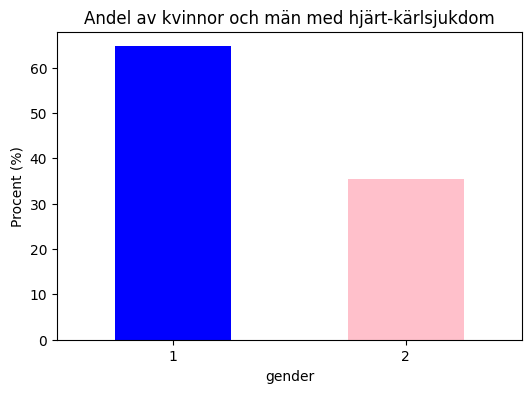

In [11]:
# Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

heart_disease_by_gender = df[df["cardio"] == 1]["gender"].value_counts(normalize=True) * 100
print("heart_disease_by_gender", heart_disease_by_gender)

plt.figure(figsize=(6,4))
heart_disease_by_gender.plot(kind="bar", color=["blue", "pink"])
plt.title("Andel av kvinnor och män med hjärt-kärlsjukdom")
plt.ylabel("Procent (%)")
plt.xticks(rotation=0)
plt.show()

In [12]:
def calculate_bmi(weight_in_kg, height_in_meters):
    return weight_in_kg / np.square(height_in_meters)

In [13]:
df["bmi"] = calculate_bmi(df["weight"], df["height"] / 100)

In [14]:
df["bmi"].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

<Axes: >

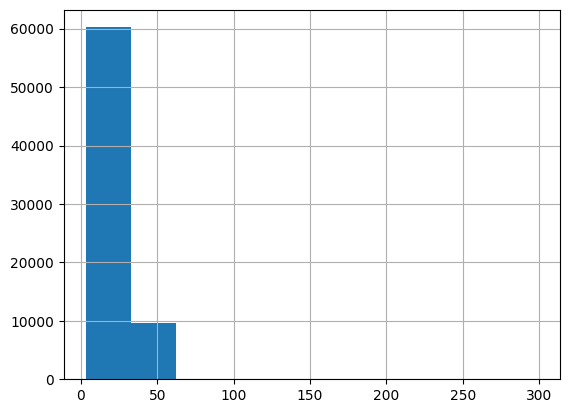

In [15]:
df["bmi"].hist()

<Axes: >

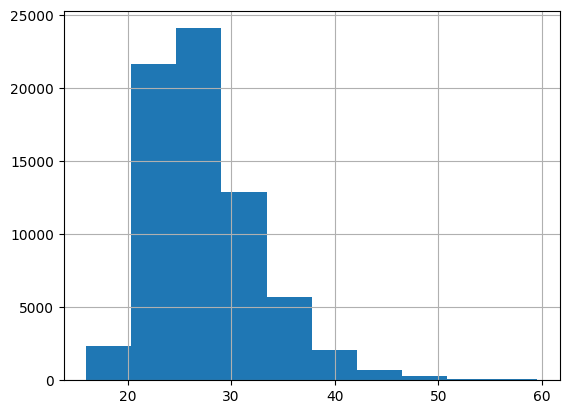

In [16]:
# The lowest recorded BMI is 10.0
# https://www.torrinomedica.it/english/dietology/bmi-dietology/what-is-the-lowest-bmi-ever-recorded/#:~:text=The%20lowest%20recorded%20BMI%20is%2010.0%2C%20observed%20in,based%20on%20their%20weight%20relative%20to%20their%20height.

# (Heigest BMI): 251.1
# https://en.wikipedia.org/wiki/List_of_heaviest_people

# TODO: Justera/förklara gränserna.

min_allowed_bmi = 16
max_allowed_bmi = 60

df = df.query(f'bmi > {min_allowed_bmi} and bmi < {max_allowed_bmi}')
df["bmi"].hist()

<Axes: >

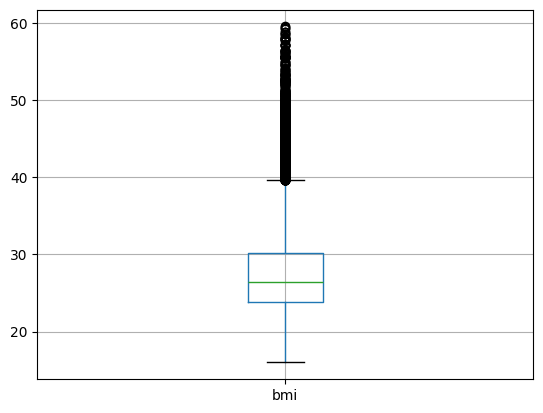

In [17]:
df.boxplot(column="bmi")

In [19]:
df["bmi_category"] = 1  

bmi_category_labels = {
    1: "normal range",
    2: "over-weight",
    3: "obese (class I)",
    4: "obese (class II)",
    5: "obese (class III)",
}

df.loc[(df["bmi"] >= 25.0) & (df["bmi"] < 30), "bmi_category"] = 2
df.loc[(df["bmi"] >= 30) & (df["bmi"] < 35), "bmi_category"] = 3
df.loc[(df["bmi"] >= 35) & (df["bmi"] < 40), "bmi_category"] = 4
df.loc[(df["bmi"] >= 40), "bmi_category"] = 5

In [20]:
df["ap_hi"].describe()

count    69873.000000
mean       128.827387
std        154.147501
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

<Axes: >

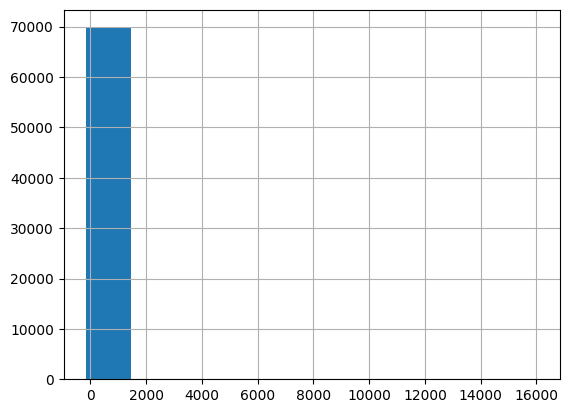

In [21]:
df["ap_hi"].hist()

In [22]:
# TODO: Justera/förklara gränserna.
min_allowed_ap_hi = 0
max_allowed_ap_hi = 400

df = df.query(f'ap_hi > {min_allowed_ap_hi} and ap_hi < {max_allowed_ap_hi}')

<Axes: >

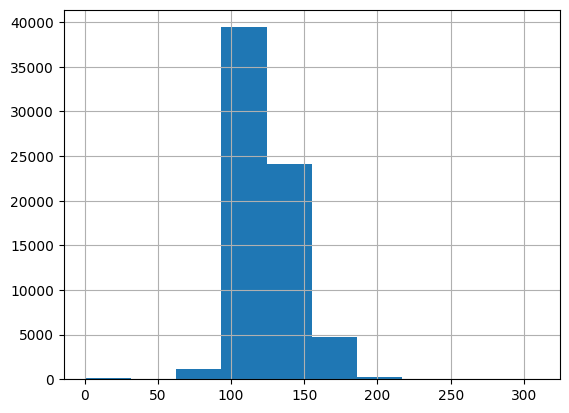

In [23]:
df["ap_hi"].hist()

<Axes: >

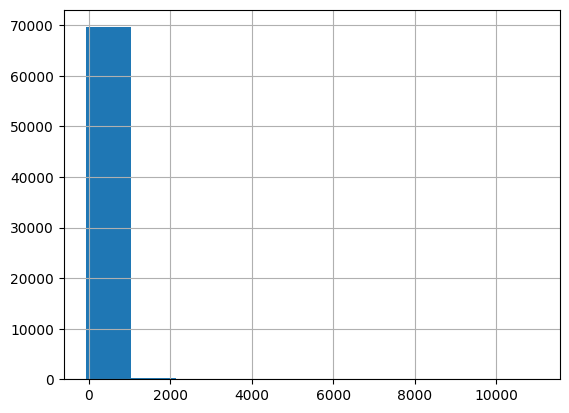

In [24]:
df["ap_lo"].hist()

In [25]:
# TODO: Justera/förklara gränserna.
min_allowed_ap_lo = 0
max_allowed_ap_lo = 200

df = df.query(f'ap_lo > {min_allowed_ap_lo} and ap_lo < {max_allowed_ap_lo}')

<Axes: >

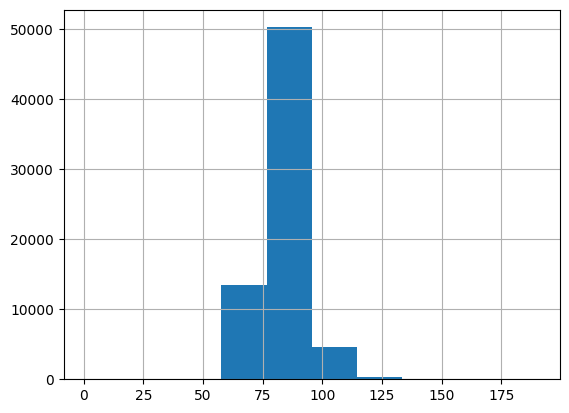

In [26]:
df["ap_lo"].hist()

In [27]:
df["blood_presure_category"] = 0

blood_presure_category_labels = {
    1: "Healthy",
    2: "Elevated",
    3: "Stage 1 hypertension",
    4: "Stage 2 hypertension",
    5: "Hypertension crisis",
}

df.loc[(df["ap_hi"] < 120) & (df["ap_lo"] < 80), "blood_presure_category"] = 1
df.loc[((df["ap_hi"] >= 120) & (df["ap_hi"] < 130)) & (df["ap_lo"] < 80), "blood_presure_category"] = 2
df.loc[((df["ap_hi"] >= 130) & (df["ap_hi"] < 140)) | ((df["ap_lo"] >= 80) & (df["ap_lo"] < 90)), "blood_presure_category"] = 3
df.loc[(df["ap_hi"] >= 140) | (df["ap_lo"] >= 90), "blood_presure_category"] = 4
df.loc[(df["ap_hi"] > 180) | (df["ap_lo"] > 120), "blood_presure_category"] = 5

df["blood_presure_category"].unique()

array([3, 4, 1, 2, 5])

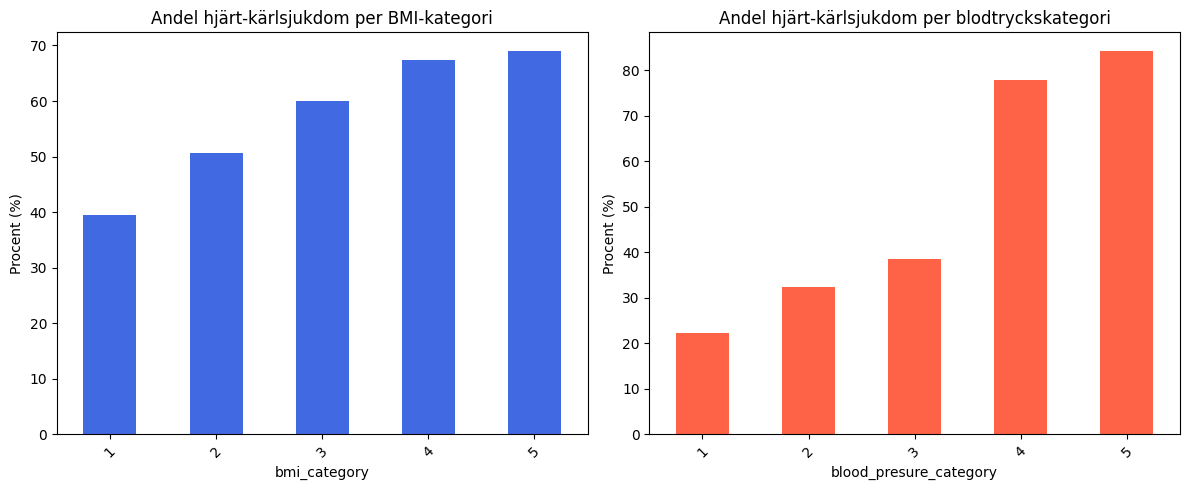

In [28]:
bmi_group = df.groupby("bmi_category")["cardio"].mean() * 100
bp_group = df.groupby("blood_presure_category")["cardio"].mean() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bmi_group.plot(kind="bar", ax=axes[0], color="royalblue")
axes[0].set_title("Andel hjärt-kärlsjukdom per BMI-kategori")
axes[0].set_ylabel("Procent (%)")
axes[0].set_xticklabels(bmi_group.index, rotation=45)

bp_group.plot(kind="bar", ax=axes[1], color="tomato")
axes[1].set_title("Andel hjärt-kärlsjukdom per blodtryckskategori")
axes[1].set_ylabel("Procent (%)")
axes[1].set_xticklabels(bp_group.index, rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

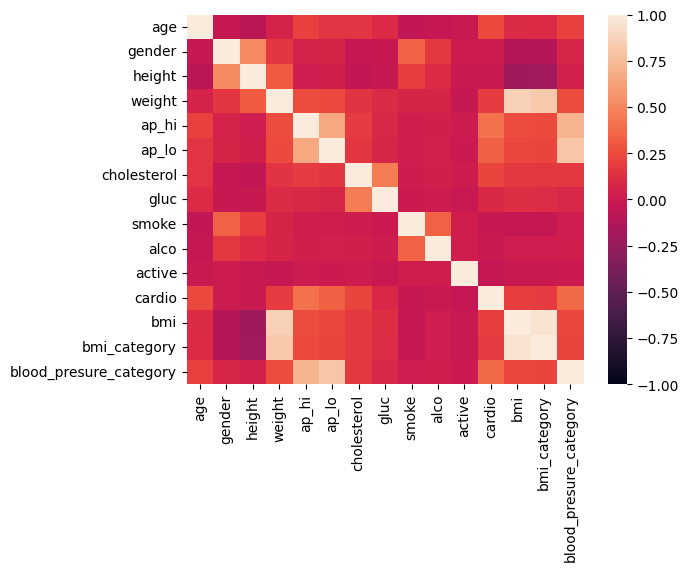

In [29]:
sns.heatmap(df.corr(), annot=False, vmin=-1, vmax=1)

Som heatmapen visar finns det en del korrelationer.

Att ap_hi och ap_lo har korrelation mot varandra samt mot blood_presure_category är ju inte förvånande.

Samma gäller ju för bmi och bmi_category.

Att det då även är korrelation mellan height och bmi, samt weight och bmi, är ju också som man tänkt eftersom bmi beräknas utifrån dessa.

Det finns även en liten korrelation mellan gender och height, vilket kan förklaras med att män har ett högra genomsnitt i längd än kvinnor generellt.

In [30]:
df_B = df.copy()

In [31]:
df_A = df.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight', 'bmi'])
df_A = pd.get_dummies(df_A, columns=['bmi_category', 'blood_presure_category', 'gender'])

In [32]:
df_B = df_B.drop(columns=['bmi_category', 'blood_presure_category', 'height', 'weight'])
df_B = pd.get_dummies(df_B, columns=['gender'])

In [33]:
from ModelTester import ModelTester

model_tester_A = ModelTester()
model_tester_A.prepare_data(df_A)

model_tester_B = ModelTester()
model_tester_B.prepare_data(df_B)

In [34]:
best_models_A = model_tester_A.train_and_optimize()

Tränar RandomForestClassifier...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Tränar LogisticRegression...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tränar KNeighborsClassifier...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [35]:
best_models_B = model_tester_B.train_and_optimize()

Tränar RandomForestClassifier...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Tränar LogisticRegression...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Tränar KNeighborsClassifier...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


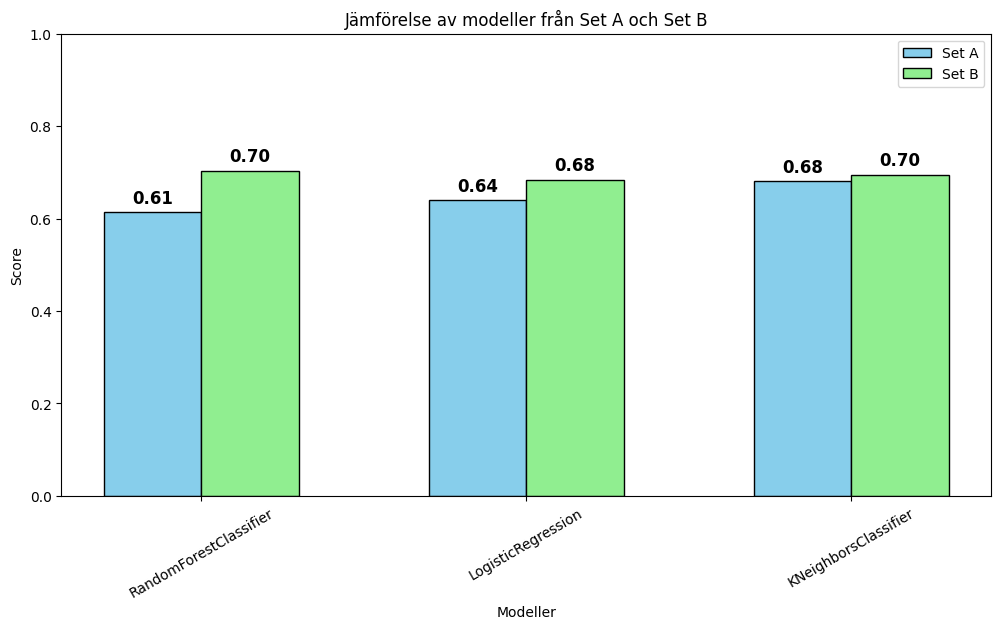

In [36]:
model_names = list(best_models_A.keys())
score_values_A = [best_models_A[name]["score"] for name in model_names]
score_values_B = [best_models_B[name]["score"] for name in model_names]

positions_A = np.arange(len(model_names)) 
positions_B = positions_A + 0.3

plt.figure(figsize=(12, 6))
plt.bar(positions_A, score_values_A, width=0.3, label="Set A", color="skyblue", edgecolor="black", align="center")
plt.bar(positions_B, score_values_B, width=0.3, label="Set B", color="lightgreen", edgecolor="black", align="center")

plt.xlabel("Modeller")
plt.ylabel("Score")
plt.title("Jämförelse av modeller från Set A och Set B")
plt.ylim(0, 1)
plt.xticks(positions_A + 0.15, model_names, rotation=30)
plt.legend()

for i, v in enumerate(score_values_A):
    plt.text(positions_A[i], v + 0.02, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")
for i, v in enumerate(score_values_B):
    plt.text(positions_B[i], v + 0.02, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")

plt.show()

model RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=250)
model LogisticRegression(C=0.1, max_iter=1000)
model KNeighborsClassifier(leaf_size=20, n_neighbors=13, weights='distance')
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      5742
           1       0.72      0.70      0.71      5621

    accuracy                           0.72     11363
   macro avg       0.72      0.72      0.72     11363
weighted avg       0.72      0.72      0.72     11363



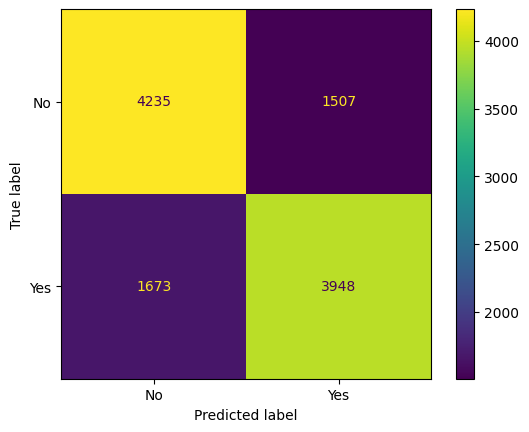

In [37]:
model_tester_B.useVotingClassifier()

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      5742
           1       0.71      0.69      0.70      5621

    accuracy                           0.71     11363
   macro avg       0.71      0.71      0.71     11363
weighted avg       0.71      0.71      0.71     11363



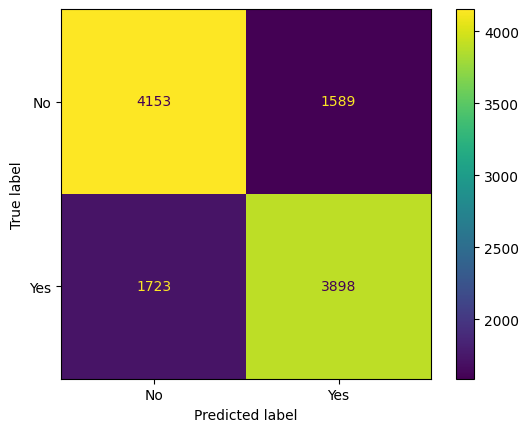

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set B och KNN:

# Kombinera X_train med X_val och y_train med y_val
if not model_tester_B.X_val is None:
    model_tester_B.X_train = np.concatenate([model_tester_B.X_train, model_tester_B.X_val], axis=0)
if not model_tester_B.y_val is None:
    model_tester_B.y_train = np.concatenate([model_tester_B.y_train, model_tester_B.y_val], axis=0)
model_tester_B.X_val = None
model_tester_B.y_val = None

model = best_models_B["KNeighborsClassifier"]["best_estimator"]

model.fit(model_tester_B.X_train, model_tester_B.y_train)

y_pred = model.predict(model_tester_B.X_test)

print(classification_report(model_tester_B.y_test, y_pred))

cm = confusion_matrix(model_tester_B.y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()